Dataset1:  Insurance Dataset


Load Data and Write script to perform following operations

1st Task: Consider the above data and perform preprocessing. 

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('insurance.csv')

# Encoding categorical variables
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# Checking for missing values (should be 0 in this case)
print(data.isnull().sum())

# Scaling the numerical features (age, bmi, children)
scaler = StandardScaler()
scaled_features = ['age', 'bmi', 'children']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

# Display the preprocessed data
print(data.head())




age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
        age  sex       bmi  children  smoker  region      charges
0 -1.438764    0 -0.453320 -0.908614       1       3  16884.92400
1 -1.509965    1  0.509621 -0.078767       0       2   1725.55230
2 -0.797954    1  0.383307  1.580926       0       2   4449.46200
3 -0.441948    1 -1.305531 -0.908614       0       1  21984.47061
4 -0.513149    1 -0.292556 -0.908614       0       1   3866.85520


2nd task-- Perform basic EDA for data analysis.

                age          sex           bmi      children       smoker  \
count  1.338000e+03  1338.000000  1.338000e+03  1.338000e+03  1338.000000   
mean  -1.805565e-16     0.505232 -2.124194e-16 -5.576008e-17     0.204783   
std    1.000374e+00     0.500160  1.000374e+00  1.000374e+00     0.403694   
min   -1.509965e+00     0.000000 -2.412011e+00 -9.086137e-01     0.000000   
25%   -8.691547e-01     0.000000 -7.164063e-01 -9.086137e-01     0.000000   
50%   -1.474046e-02     1.000000 -4.320880e-02 -7.876719e-02     0.000000   
75%    8.396738e-01     1.000000  6.611572e-01  7.510793e-01     0.000000   
max    1.765289e+00     1.000000  3.685522e+00  3.240619e+00     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  13270.422265  
std       1.104885  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.

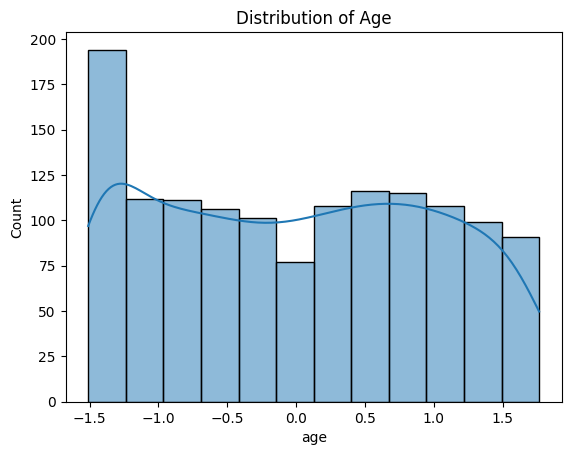

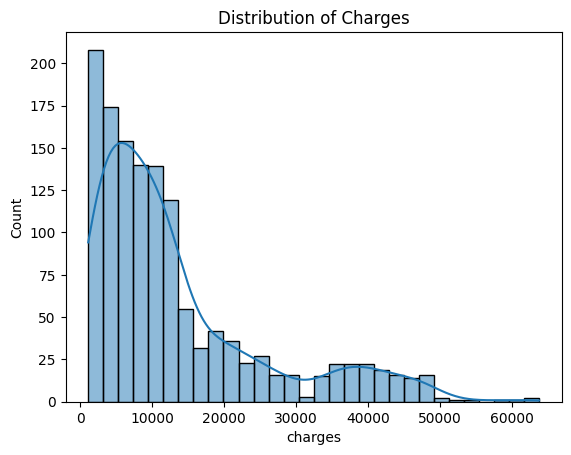

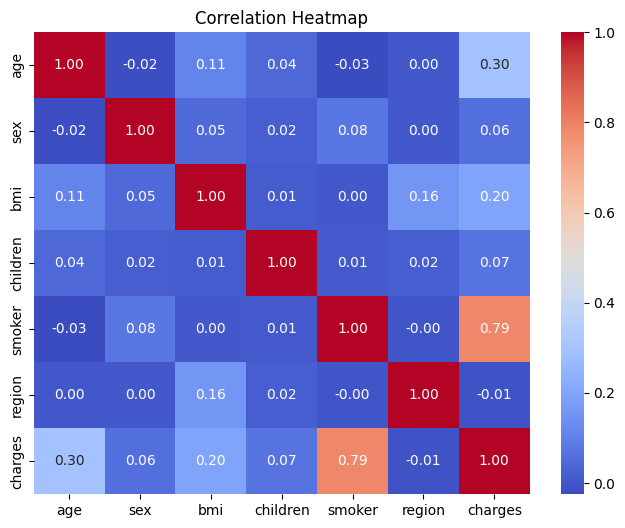

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Displaying descriptive statistics
print(data.describe())

# Visualizing the distribution of age and charges
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

# Creating a heatmap to visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



Task 3-- Perform feature engineering to select appropriate features.

In [4]:
# Step 1: Select a single feature (age) for Simple Linear Regression
X = data[['age']]  # Independent variable (single feature: 'age')

# Step 2: Select the target variable (charges)
y = data['charges']  # Dependent variable (target: 'charges')


from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (1070, 1)
Test set size: (268, 1)


Task 4: Construct linear regression model

In [5]:
from sklearn.linear_model import LinearRegression

# Step 1: Create the Linear Regression model
model = LinearRegression()

# Step 2: Train the model using the training data
model.fit(X_train, y_train)

# Display model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Model Coefficients: [3379.10867801]
Model Intercept: 13310.004117644115


Task 5: Evaluate the Model with Appropriate Metrics

Mean Squared Error: 135983957.4805469
R-squared: 0.12408973539501944


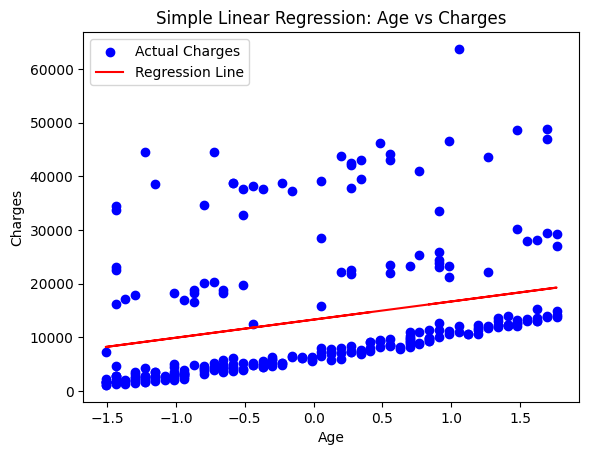

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 2: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Step 3: Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

import matplotlib.pyplot as plt

# Step 1: Visualize the actual vs predicted charges (scatter plot)
plt.scatter(X_test, y_test, color='blue', label='Actual Charges')  # Actual values
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # Predicted values

# Step 2: Customize the plot
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Simple Linear Regression: Age vs Charges')
plt.legend()

# Step 3: Display the plot
plt.show()



Task 6: Generate the Results

In [8]:
# Display the results in a clean format
print("\n### Model Evaluation Results ###")
print("\nLinear Regression Model:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- R-squared (R²): {r2:.2f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.2f}")



### Model Evaluation Results ###

Linear Regression Model:
- Mean Squared Error (MSE): 135983957.48
- R-squared (R²): 0.12
- Root Mean Squared Error (RMSE): 11661.22
